In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import de la base
df = pd.read_csv("./databases/bpe/bpe_with_gps_2.csv", sep =",")

C:\Users\olivier\anaconda\envs\Geo\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471192 entries, 0 to 2471191
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   DEP              object 
 1   DEPCOM           object 
 2   AN               int64  
 3   TYPEQU           object 
 4   QUALITE_XY       object 
 5   lat              float64
 6   lon              float64
 7   code_iris_clean  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 150.8+ MB


In [4]:
df.shape

(2471192, 8)

In [5]:
df.isnull().sum(axis=0)

DEP                0
DEPCOM             0
AN                 0
TYPEQU             0
QUALITE_XY         0
lat                0
lon                0
code_iris_clean    0
dtype: int64

In [6]:
df.head()

,DEP,DEPCOM,AN,TYPEQU,QUALITE_XY,lat,lon,code_iris_clean
0,01,01053,2019,D106,Mauvaise,46.202783,5.219245,010530402
1,01,01053,2019,D101,Mauvaise,46.202783,5.219245,010530402
2,01,01053,2019,D111,Mauvaise,46.202783,5.219245,010530402
3,01,01053,2019,D112,Mauvaise,46.202783,5.219245,010530402
4,01,01034,2019,D101,Bonne,45.761208,5.684976,010340102


In [7]:
# % de valeurs nulles par champ
df.isnull().sum()/len(df)*100

DEP                0.0
DEPCOM             0.0
AN                 0.0
TYPEQU             0.0
QUALITE_XY         0.0
lat                0.0
lon                0.0
code_iris_clean    0.0
dtype: float64

In [8]:
#On va transformer en int les num de départements. Je choisis de supprimer les infos correspondant à 2A et 2B soit la corse
df = df[-((df["DEP"] == "2A") | (df["DEP"] == "2B"))]
df["DEP"] = df["DEP"].astype(int)
df.shape

(2451145, 8)

In [9]:
# On compte le nombre d'équipement par département
df["DEP"].value_counts()

75    135306
13     86039
59     76706
69     69381
33     65177
       ...  
52      6032
55      5953
23      4723
90      4297
48      3881
Name: DEP, Length: 98, dtype: int64

<AxesSubplot:xlabel='DEP', ylabel='count'>

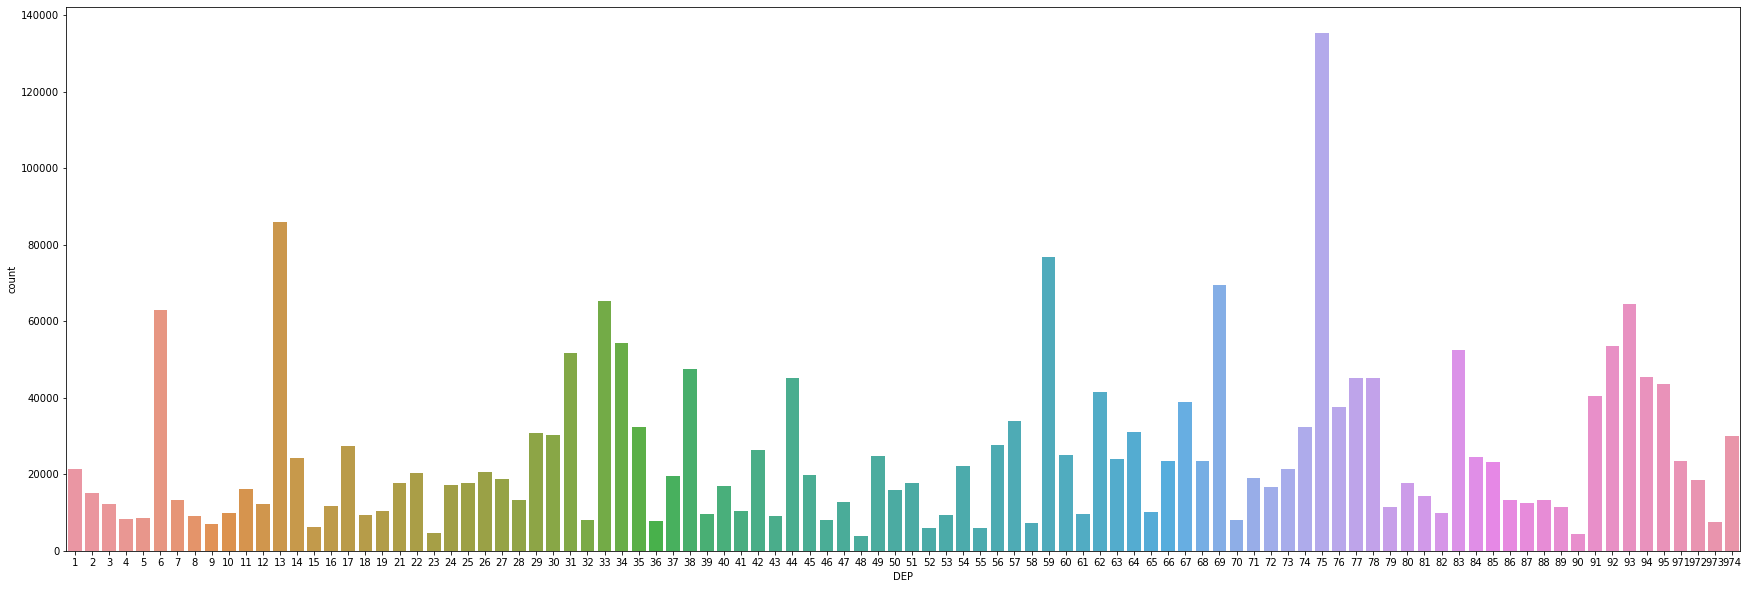

In [10]:
fig, ax = plt.subplots(figsize=(30,10))
sns.countplot(x="DEP", data = df)

<AxesSubplot:xlabel='TYPEQU', ylabel='count'>

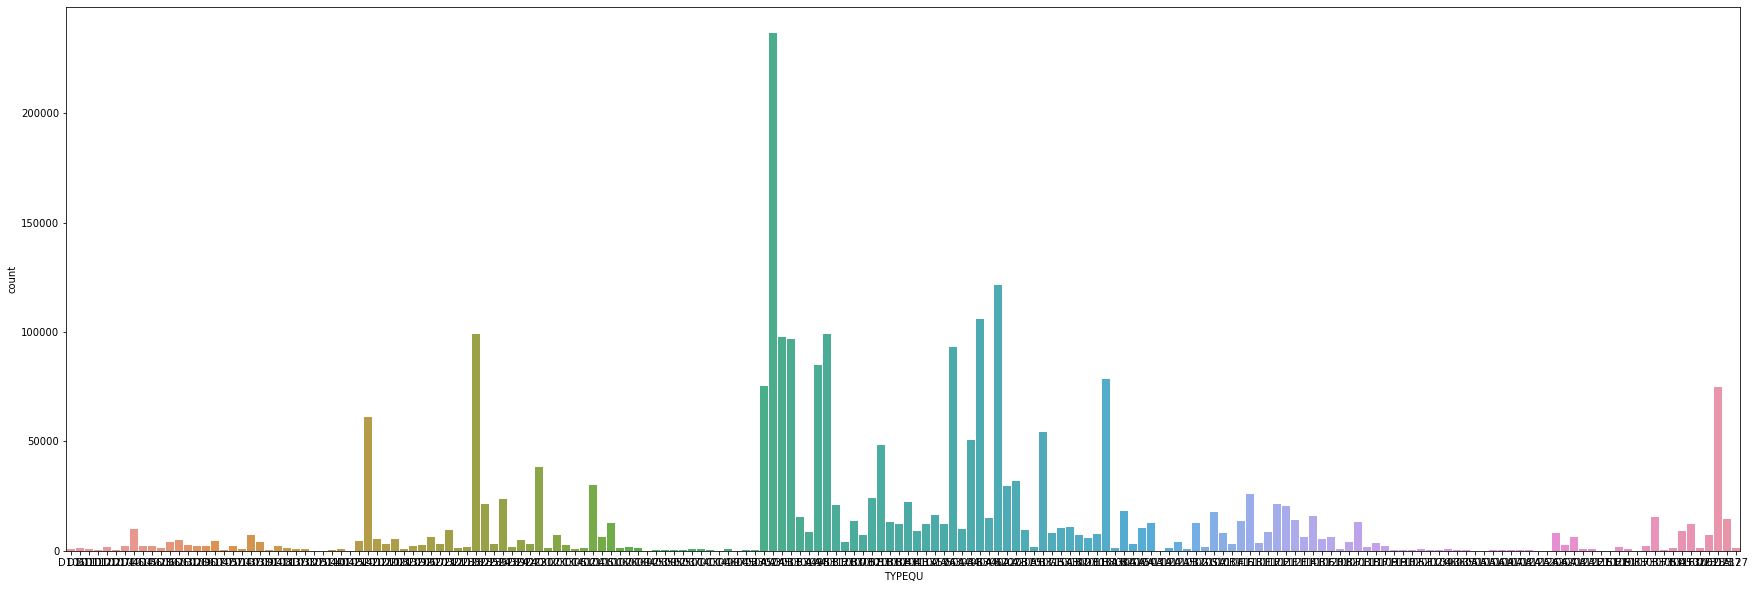

In [11]:
fig, ax = plt.subplots(figsize=(30,10))
sns.countplot(x="TYPEQU", data = df)

In [12]:
#Je décide de ne conserver que certains équipements
eqfin = ["A101", "A104", "A203", "A504", "B101", "B102", "B201", "B202", "B203", "C101", "C102", "C104", "C105", "C201", "C301", "C302", "C304", "C305", "C501", "C502", "C503", "C504", "C701", "C702","D101", "D102", "D103", "D106", "D107", "D301","D502", "E102", "E107", "E108", "E109", "F109","F121", "F201", "F202", "F303", "G102", "G103", "G104"]

In [13]:
df["EQFIN"] = df["TYPEQU"].apply(lambda row : row in eqfin)

In [14]:
df1 = df[df["EQFIN"]==True]

In [15]:
dic = {"A101" : "Police ou gendarmerie",
       "A104" : "Police ou gendarmerie",
       "A203" : "Banques",
       "A504" : "Restaurants",
       "B101" : "Alimentation",
       "B102" : "Alimentation",
       "B201" : "Alimentation",
       "B202" : "Alimentation",
       "B203" : "Boulangerie",
       "C101" : "Ecole mat et primaire",
       "C102" : "Ecole mat et primaire",
       "C104" : "Ecole mat et primaire",
       "C105" : "Ecole mat et primaire",
       "C201" : "Collège ou lycée",
       "C301" : "Collège ou lycée",
       "C302" : "Collège ou lycée",
       "C303" : "Collège ou lycée",
       "C304" : "Collège ou lycée",
       "C305" : "Collège ou lycée",
       "C501" : "Ecole sup",
       "C502" : "Ecole sup",
       "C503" : "Ecole sup",
       "C504" : "Ecole sup",
       "C701" : "Résidence U",
       "C702" : "Resto U",
       "D101" : "Etab hospi",
       "D102" : "Etab hospi",
       "D103" : "Etab hospi",
       "D106" : "Etab hospi",
       "D107" : "Etab hospi",
       "D301" : "Pharmacie",
       "D502" : "Crèche",
       "E102" : "Aéroport",
       "E107" : "Gare nationale",
       "E108" : "Gare",
       "E109" : "Gare",
       "F109" : "Parcours sportif/santé",
       "F121" : "Salle multisport",
       "F201" : "Baignade",
       "F202" : "Port plaisance",
       "F303" : "Cinéma",
       "G102" : "Hotels",
       "G103" : "Camping",
       "G104" : "Info touristique"       
      }

In [16]:
df1["EQ"] = df1["TYPEQU"].replace(dic)

<ipython-input-16-df7fe7adaefa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["EQ"] = df1["TYPEQU"].replace(dic)


<AxesSubplot:xlabel='count', ylabel='EQ'>

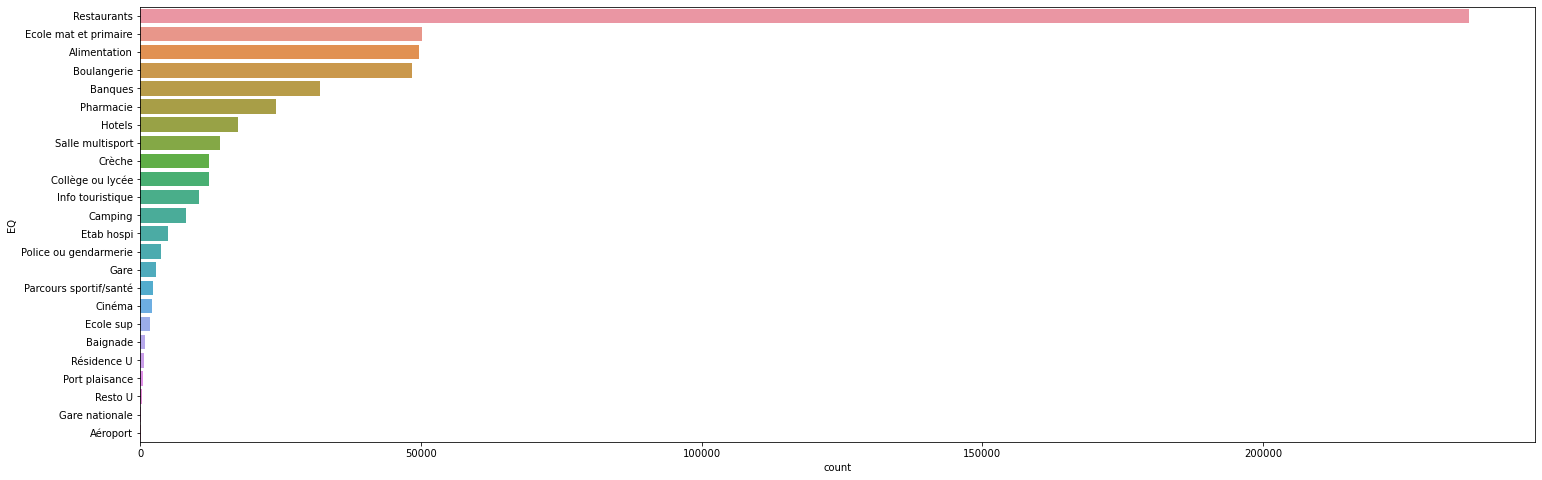

In [17]:
fig, ax = plt.subplots(figsize=(25,8))
sns.countplot(y = "EQ", data = df1, orient = "v", order = df1['EQ'].value_counts().index)

<AxesSubplot:xlabel='QUALITE_XY', ylabel='count'>

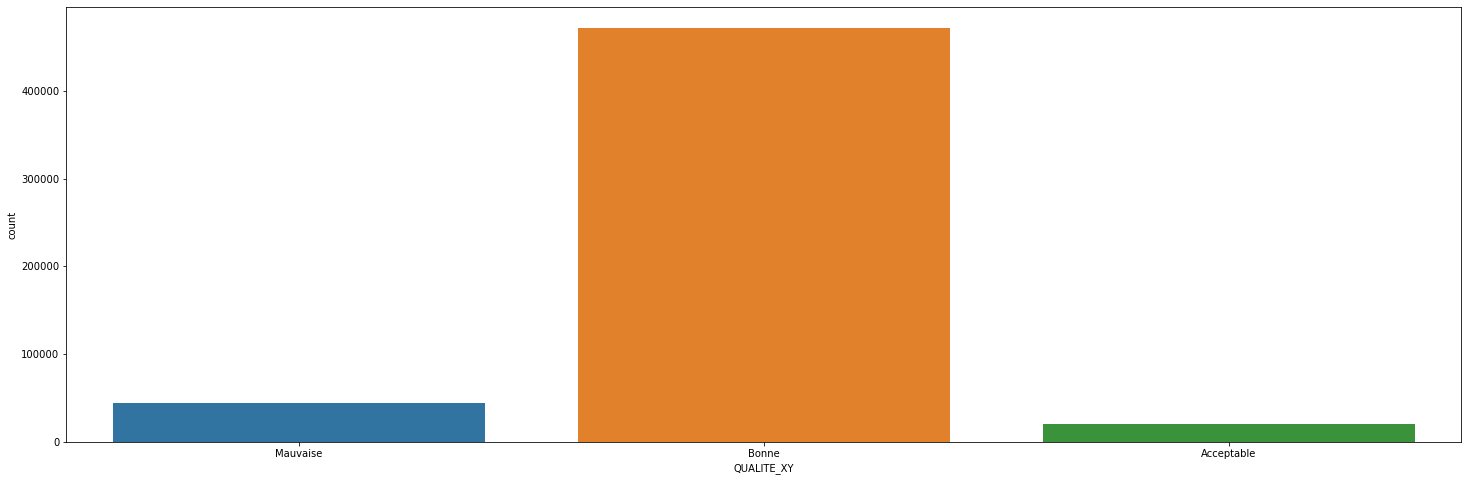

In [18]:
fig, ax = plt.subplots(figsize=(25,8))
sns.countplot(x="QUALITE_XY", data = df1)

In [19]:
pd.crosstab(df1["EQ"],df["DEP"])

DEP,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,971,972,973,974
EQ,,,,,,,,,,,,,,,,,,,,,
Alimentation,341,293,277,221,177,1180,281,161,151,207,...,57,847,1103,1795,1119,780,1218,608,393,1004
Aéroport,0,0,0,0,0,2,0,0,0,1,...,0,0,0,1,1,1,1,1,4,2
Baignade,11,2,2,11,25,0,22,7,5,7,...,0,0,0,0,0,1,6,2,2,8
Banques,277,167,173,90,77,607,154,105,78,127,...,69,518,773,408,513,381,159,148,38,200
Boulangerie,407,342,302,182,173,981,328,233,165,219,...,104,658,853,1001,739,637,537,366,102,665
Camping,65,25,71,128,126,76,290,35,72,20,...,3,19,0,1,1,7,0,0,0,0
Cinéma,19,15,8,14,23,45,19,5,11,4,...,2,31,41,30,36,27,6,4,4,11
Collège ou lycée,102,123,74,39,26,179,64,62,34,57,...,27,205,241,299,253,237,100,99,61,158
Crèche,100,45,43,47,39,217,61,32,35,31,...,20,282,584,344,385,228,59,68,31,127


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536612 entries, 0 to 2371665
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DEP              536612 non-null  int32  
 1   DEPCOM           536612 non-null  object 
 2   AN               536612 non-null  int64  
 3   TYPEQU           536612 non-null  object 
 4   QUALITE_XY       536612 non-null  object 
 5   lat              536612 non-null  float64
 6   lon              536612 non-null  float64
 7   code_iris_clean  536612 non-null  object 
 8   EQFIN            536612 non-null  bool   
 9   EQ               536612 non-null  object 
dtypes: bool(1), float64(2), int32(1), int64(1), object(5)
memory usage: 55.5+ MB


In [21]:
df1 = df1.dropna(axis = 0, how = "any")

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536612 entries, 0 to 2371665
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DEP              536612 non-null  int32  
 1   DEPCOM           536612 non-null  object 
 2   AN               536612 non-null  int64  
 3   TYPEQU           536612 non-null  object 
 4   QUALITE_XY       536612 non-null  object 
 5   lat              536612 non-null  float64
 6   lon              536612 non-null  float64
 7   code_iris_clean  536612 non-null  object 
 8   EQFIN            536612 non-null  bool   
 9   EQ               536612 non-null  object 
dtypes: bool(1), float64(2), int32(1), int64(1), object(5)
memory usage: 39.4+ MB


In [23]:
df1.drop(["EQFIN"], axis = 1)

,DEP,DEPCOM,AN,TYPEQU,QUALITE_XY,lat,lon,code_iris_clean,EQ
0,1,01053,2019,D106,Mauvaise,46.202783,5.219245,010530402,Etab hospi
1,1,01053,2019,D101,Mauvaise,46.202783,5.219245,010530402,Etab hospi
4,1,01034,2019,D101,Bonne,45.761208,5.684976,010340102,Etab hospi
5,1,01034,2019,D102,Bonne,45.761208,5.684976,010340102,Etab hospi
6,1,01034,2019,D106,Bonne,45.761208,5.684976,010340102,Etab hospi
...,...,...,...,...,...,...,...,...,...
2371661,974,97411,2019,D502,Bonne,56.141043,-2.726819,974110111,Crèche
2371662,974,97415,2019,D502,Mauvaise,55.916643,-2.990195,974151501,Crèche
2371663,974,97415,2019,D502,Mauvaise,55.969413,-2.940308,974151702,Crèche
2371664,974,97414,2019,D502,Mauvaise,55.754464,-2.701898,974140107,Crèche


In [24]:
df1.to_csv("05 - equipements_gps_clean.csv")

In [25]:
df2 = df1.groupby(['EQ', 'code_iris_clean'])['TYPEQU'].count().reset_index().rename(columns = {'TYPEQU': 'nb_equip'})

In [26]:
df3 = pd.crosstab(df2['code_iris_clean'], df2['EQ'], values = df2['nb_equip'], aggfunc = 'sum')
df3 = df3.fillna(0)
df3 = df3.astype(int)
df3.head()

EQ,Alimentation,Aéroport,Baignade,Banques,Boulangerie,Camping,Cinéma,Collège ou lycée,Crèche,Ecole mat et primaire,...,Hotels,Info touristique,Parcours sportif/santé,Pharmacie,Police ou gendarmerie,Port plaisance,Restaurants,Resto U,Résidence U,Salle multisport
code_iris_clean,,,,,,,,,,,,,,,,,,,,,
010010000,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
010040101,6,0,0,1,3,0,0,1,0,0,...,0,0,0,1,1,0,10,0,0,3
010040102,4,0,0,0,2,0,0,0,0,3,...,0,0,0,1,0,0,18,0,0,0
010040201,2,0,0,5,4,0,1,2,1,4,...,0,0,0,4,0,0,12,0,0,0
010040202,3,0,0,6,1,0,0,1,1,0,...,1,1,1,0,0,0,5,0,0,2


In [27]:
df3.to_csv('./databases/inter/03A - equipements_nb_clean.csv', encoding = 'UTF-8')